## Author : Sayali Kudale 


### This notebook implements the Elbow Method which is used to determine the optimal number of clusters for k-mean clustering algorithm

In [1]:
# import the required libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset
df_questionsAllData = pd.read_csv("Data/SO_ProcessedData.csv", encoding="ISO-8859-1")

In [3]:


Df_QuestionText= df_questionsAllData[["QuestionText"]]
Df_Answers = df_questionsAllData[['Tags', 'AnswerOwnerUserId','AnswerCreationDate','AnswerScore']]


In [4]:

vectorizer = TfidfVectorizer()

In [5]:
def TfidVectorization(data):
    vec = vectorizer.fit(data)   
    vectorized = vec.transform(data)
    return vec, vectorized
    

In [6]:
# create numerical vectors from the text data 
vec, qstnData = TfidVectorization(Df_QuestionText["QuestionText"].values.astype('U'))


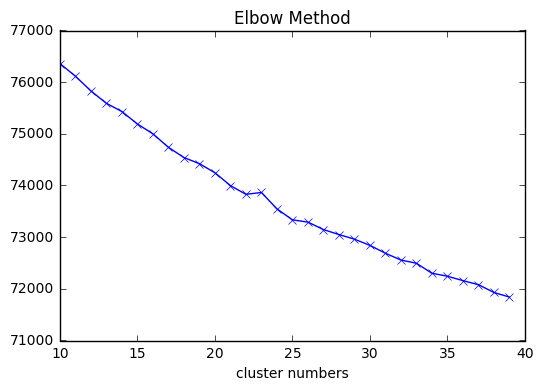

In [7]:
# ELbow method is executed for the clusters ranging between 10-40

K = range(10,40)
SSE = []
for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(qstnData)
    SSE.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()